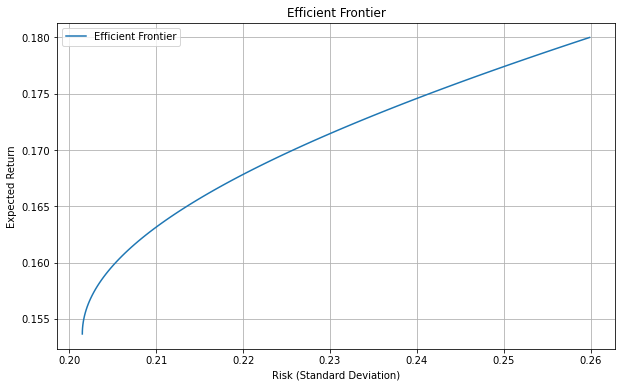

In [1]:
import numpy as np

def calculate_efficient_frontier(returns, cov_matrix, risk_free_rate=0):
    """
    Calculate the efficient frontier using the Critical Line Algorithm (CLA).

    Args:
        returns (numpy.ndarray): Expected returns of the assets.
        cov_matrix (numpy.ndarray): Covariance matrix of the asset returns.
        risk_free_rate (float): Risk-free rate for Sharpe ratio calculation.

    Returns:
        weights (list): Weights of assets on the efficient frontier.
        returns (list): Expected returns of the portfolios on the frontier.
        risks (list): Risks (standard deviations) of the portfolios on the frontier.
    """
    num_assets = len(returns)
    ones = np.ones(num_assets)

    # Inverse of the covariance matrix
    inv_cov = np.linalg.inv(cov_matrix)

    # Intermediate calculations
    A = ones @ inv_cov @ ones
    B = ones @ inv_cov @ returns
    C = returns @ inv_cov @ returns
    D = A * C - B**2

    # Efficient frontier weights for minimum variance
    weights_min_var = inv_cov @ ones / A
    mu_min_var = B / A

    # Efficient frontier weights for maximum Sharpe ratio
    weights_max_sharpe = inv_cov @ (returns - risk_free_rate * ones) / (B - risk_free_rate * A)

    # Generate efficient frontier
    frontier_weights = []
    frontier_returns = []
    frontier_risks = []

    mus = np.linspace(mu_min_var, max(returns), 100)  # Range of target returns
    for mu in mus:
        lambda_1 = (C - B * mu) / D
        lambda_2 = (A * mu - B) / D
        weights = lambda_1 * inv_cov @ ones + lambda_2 * inv_cov @ returns
        frontier_weights.append(weights)
        frontier_returns.append(mu)
        frontier_risks.append(np.sqrt(weights @ cov_matrix @ weights))

    return frontier_weights, frontier_returns, frontier_risks


# Example usage
if __name__ == "__main__":
    # Example data: Expected returns and covariance matrix
    expected_returns = np.array([0.12, 0.18, 0.14])  # Example returns for 3 assets
    covariance_matrix = np.array([
        [0.1, 0.02, 0.04],
        [0.02, 0.08, 0.01],
        [0.04, 0.01, 0.07]
    ])

    # Calculate efficient frontier
    weights, returns, risks = calculate_efficient_frontier(expected_returns, covariance_matrix)

    # Plot the efficient frontier
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(risks, returns, label="Efficient Frontier")
    plt.xlabel("Risk (Standard Deviation)")
    plt.ylabel("Expected Return")
    plt.title("Efficient Frontier")
    plt.legend()
    plt.grid(True)
    plt.show()